In [5]:
library(ggplot2)
library(magrittr)
library(dplyr)

In [3]:
df1 <- read.table( 'american_airline_empl.txt', header = T )
df2 <- read.table('delta_airline_empl.txt', header = T)
df3 <- read.table( 'federal_express_empl.txt' , header = T )  
df4 <- read.table( 'united_airline_empl.txt', header = T )  

df1$company = c(rep('american_airline',nrow(df1)))
df2$company = c(rep('delta_airline',nrow(df2)))
df3$company = c(rep('federal_airline',nrow(df3)))
df4$company = c(rep('united_airline',nrow(df4)))

df_merged <- rbind(df1,df2,df3,df4)
df_merged$Full.time <- as.numeric(gsub(",","",df_merged$Full.time ))
df_merged$Part.time <-as.numeric(gsub(",","",df_merged$Part.time))
df_merged$Grand_Total <-as.numeric(gsub(",","",df_merged$Grand_Total))

df_merged

Month,Year,Full.time,Part.time,Grand_Total,company
<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,1990,68137,9039,77176,american_airline
2,1990,68725,9273,77998,american_airline
3,1990,69509,9376,78885,american_airline
4,1990,69713,9326,79039,american_airline
5,1990,70376,9309,79685,american_airline
6,1990,71258,9369,80627,american_airline
7,1990,72018,9651,81669,american_airline
8,1990,72513,9694,82207,american_airline
9,1990,72776,9788,82564,american_airline


`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.


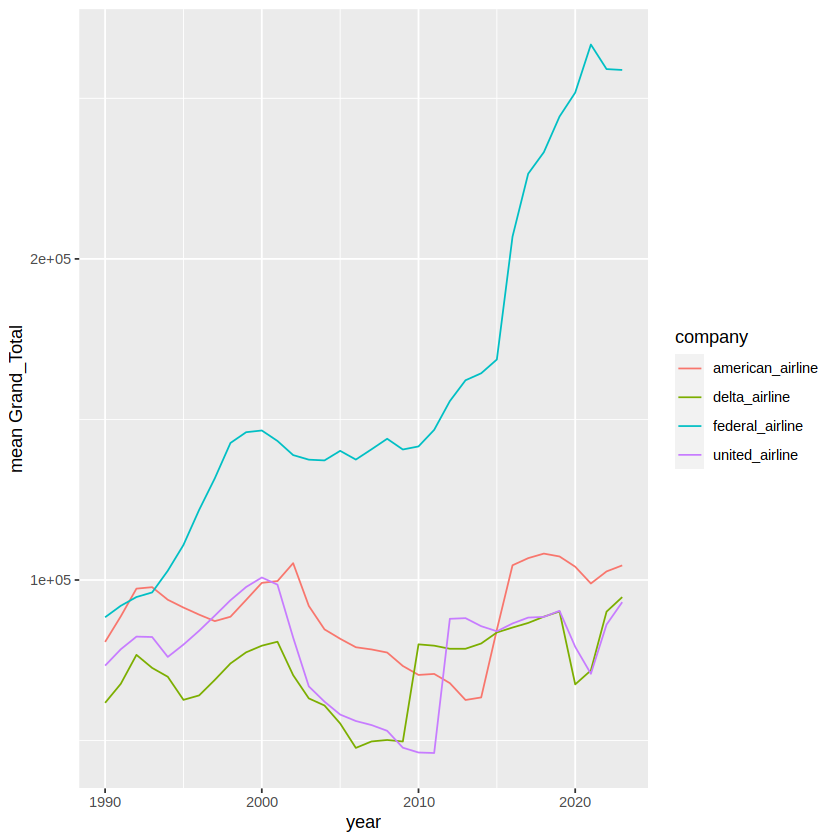

In [4]:
df <- df_merged %>% group_by(Year,company) %>% summarize(Grand_Total=mean(Grand_Total))

ggplot(data = df, aes(x=Year, y=Grand_Total, group =company, color = company))+
geom_line()+
labs(x='year', y='mean Grand_Total')

In [13]:
dfA <- df %>% filter(company == 'american_airline')
dfA$Year[which(dfA$Grand_Total==max(dfA$Grand_Total))]
dfA$Year

[1] 2018

#### ex 2

In [2]:
library(nycflights13)
library(lubridate)

flights[1000:1003,]

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,2,809,810,-1,950,948,2,B6,1051,N304JB,JFK,PIT,71,340,8,10,2013-01-02 08:00:00
2013,1,2,810,800,10,1008,1014,-6,DL,2119,N358NW,LGA,MSP,142,1020,8,0,2013-01-02 08:00:00
2013,1,2,811,815,-4,1100,1056,4,DL,914,N328NW,LGA,DEN,253,1620,8,15,2013-01-02 08:00:00
2013,1,2,811,815,-4,1126,1131,-5,DL,1167,N305DQ,JFK,TPA,160,1005,8,15,2013-01-02 08:00:00


In [ ]:
flights$day <- yday(as.Date(flights$time_hour))

`summarise()` has grouped output by 'day'. You can override using the `.groups`
argument.


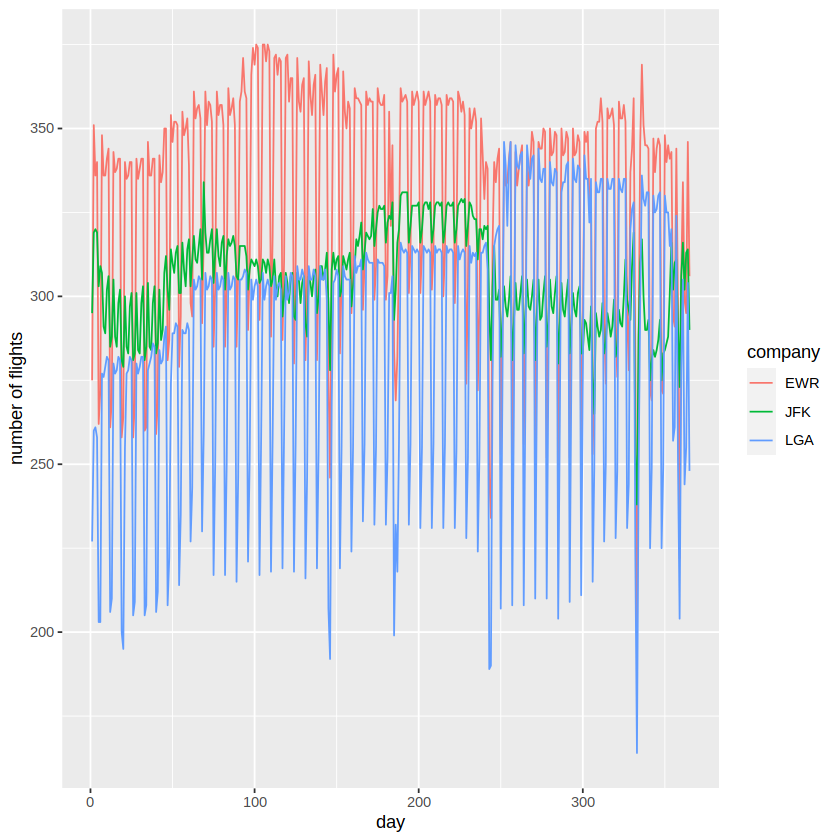

In [24]:
df <-flights
#df <- df %>% filter(origin == 'JFK') %>% group_by(day) %>% summarize(tot_count=n())
df <- df %>% group_by(day, origin) %>% summarize(tot_count=n())

ggplot(df, aes(x=day,y=tot_count, group=origin, color=origin))+
geom_line()+
labs(x='day', y='number of flights')+
scale_color_discrete(name='company', labels=c('EWR', 'JFK','LGA'))
